In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Q1. Load Data

In [76]:
churn= pd.read_csv(r"Z:\226524\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Q1. Describe Data

In [77]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Q2. Check Data Types

In [78]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

churn=churn.replace('Yes',1)
churn=churn.replace('No',0)
churn=churn.replace('No phone service',2)
churn

In [79]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Q3. Missing Values Count

In [80]:
column_names = churn.columns
for column in column_names:
    print(column + ' - ' + str(churn[column].isnull().sum()))

customerID - 0
gender - 0
SeniorCitizen - 0
Partner - 0
Dependents - 0
tenure - 0
PhoneService - 0
MultipleLines - 0
InternetService - 0
OnlineSecurity - 0
OnlineBackup - 0
DeviceProtection - 0
TechSupport - 0
StreamingTV - 0
StreamingMovies - 0
Contract - 0
PaperlessBilling - 0
PaymentMethod - 0
MonthlyCharges - 0
TotalCharges - 0
Churn - 0


# Q4. Extra

In [53]:
ques4=churn[['Contract','PaperlessBilling','Churn']]
ques4

,Contract,PaperlessBilling,Churn
0,Month-to-month,1,0
1,One year,0,0
2,Month-to-month,1,1
3,One year,0,0
4,Month-to-month,1,1
...,...,...,...
7038,One year,1,0
7039,One year,1,0
7040,Month-to-month,1,0
7041,Month-to-month,1,1


{'Contract': ['Month-to-month', 'One year', 'Two year'], 'Churn Count': [1655, 1821, 1869]}


[Text(0, 0, 'Month-to-month'), Text(1, 0, 'One year'), Text(2, 0, 'Two year')]

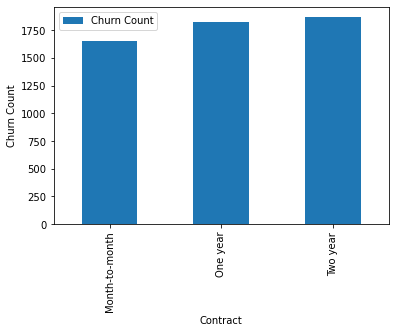

In [81]:
cont=churn['Contract'].unique()
count=0
contracts=[]
counts=[]
for i in cont:
    for j in range(len(ques4)):
        if i==ques4['Contract'][j]:
            if ques4['Churn'][j]==1:
                count +=1
    contracts.append(i)
    counts.append(count)
dict1={'Contract':contracts,'Churn Count':counts}
print(dict1)
df_cont=pd.DataFrame(dict1)
plt=df_cont[['Churn Count']].plot.bar()
plt.set_xlabel('Contract')
plt.set_ylabel('Churn Count')
plt.set_xticklabels(cont)

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

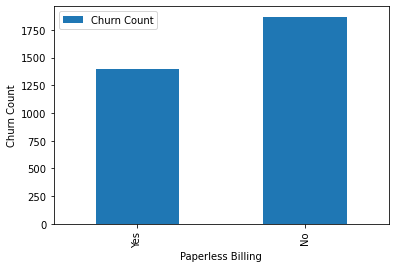

In [84]:
pb=churn['PaperlessBilling'].unique()
count=0
pbs=[]
counts=[]
for i in pb:
    for j in range(len(ques4)):
        if i==ques4['PaperlessBilling'][j]:
            if ques4['Churn'][j]==1:
                count +=1
    pbs.append(i)
    counts.append(count)
dict2={'Paperless Billing':pbs,'Churn Count':counts}
dict2
df_pb=pd.DataFrame(dict2)
plt=df_pb[['Churn Count']].plot.bar()
plt.set_xlabel('Paperless Billing')
plt.set_ylabel('Churn Count')
plt.set_xticklabels(['Yes','No'])

# Q4. Find out the churn based on contract and paperlessbilling attribute.

<AxesSubplot:xlabel='Contract', ylabel='count'>

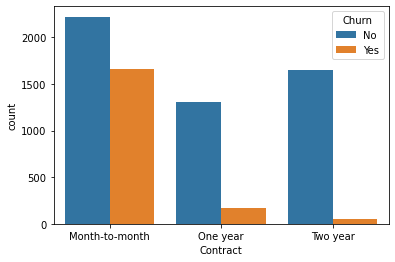

In [81]:
sns.countplot(x='Contract',hue='Churn',data=churn)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

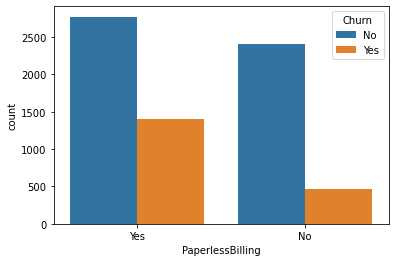

In [82]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=churn)

# Q5. Plot histograms for Tenure, TotalCharges and Monthlycharges .

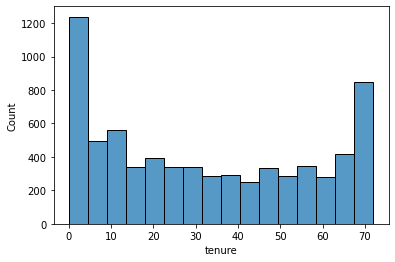

In [83]:
sns.histplot(data=churn,x='tenure');

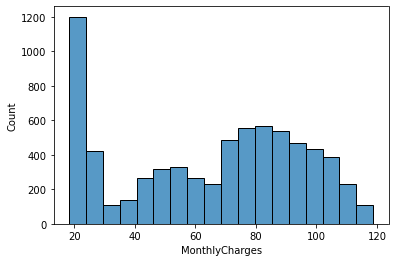

In [84]:
sns.histplot(data=churn,x='MonthlyCharges');

In [85]:
churn.TotalCharges=pd.to_numeric(churn.TotalCharges,errors='coerce') #change datatype of Total Charges
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

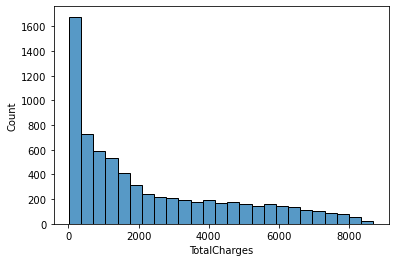

In [86]:
sns.histplot(data=churn,x='TotalCharges');

# Q6. Display density plot  for TotalCharges vs  Churn(Yes/No) and MonthlyCharges vs 	churn(Yes/No) 

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

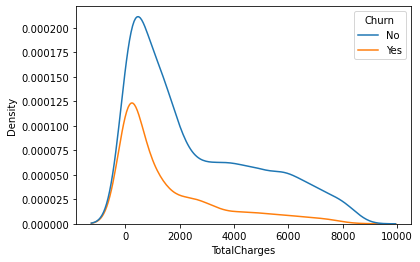

In [87]:
sns.kdeplot(data=churn,x='TotalCharges',hue="Churn")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

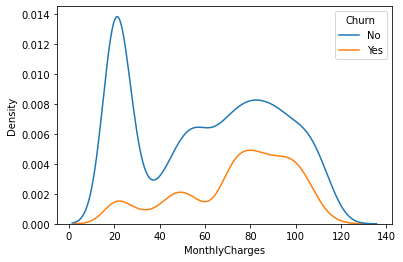

In [75]:
sns.kdeplot(data=churn,x='MonthlyCharges',hue="Churn")